In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [ ]:
UST1=pd.read_csv('/Users/23behmen_t/Downloads/UST Salesforce Data.csv')
UST1.shape

(7132, 36)

In [ ]:
UST2=pd.read_csv('/Users/23behmen_t/Downloads/UST2.csv')
UST2.shape

(100, 13)

In [ ]:
UST=pd.read_csv('/Users/23behmen_t/Downloads/UST 22.csv')
UST.shape

(6891, 16)

In [ ]:
UST.columns

Index(['Project ID', 'Opportunity Owner', 'Account Name', 'Stage', ' Amount ',
       'Expected Revenue', 'Probability', 'Service Category', 'Service Line',
       'Stage Number', 'New Business', 'Account Type', 'Billing Type',
       'MSA Signed', 'Unsolicited Proposal', 'Deliverable Type'],
      dtype='object')

In [ ]:
UST.nunique()

Project ID              6891
Opportunity Owner        115
Account Name             318
Stage                     12
 Amount                 3469
Expected Revenue        2960
Probability                2
Service Category          45
Service Line               8
Stage Number              12
New Business               2
Account Type              16
Billing Type               7
MSA Signed                 2
Unsolicited Proposal       2
Deliverable Type           3
dtype: int64

In [ ]:
UST['Stage']

0               Signed Contract
1              Verbal Agreement
2              Verbal Agreement
3              Verbal Agreement
4               Signed Contract
                 ...           
6886        No bid / Retraction
6887        No bid / Retraction
6888        No bid / Retraction
6889    Opportunity Closed LOST
6890        No bid / Retraction
Name: Stage, Length: 6891, dtype: object

In [ ]:
(UST['Stage'] == 'Verbal Agreement').sum()

171

In [ ]:
(UST['Stage'] == 'No bid / Retraction').sum()

1108

In [ ]:
(UST['Stage'] == 'Opportunity Closed LOST').sum()

710

In [ ]:
UST['Stage'].nunique()

12

In [ ]:
UST['Stage'].value_counts()

Signed Contract                     3757
No bid / Retraction                 1108
Opportunity Closed LOST              710
Execution Complete                   588
Verbal Agreement                     171
Opportunity Identification Stage     158
Proposal Preparation Stage           154
Proposal On-desk Stage               109
F2F Meeting Stage                     53
Negotiation / Short-list Stage        40
Tele-Sales Stage                      25
Phone Meeting Stage                   18
Name: Stage, dtype: int64

In [ ]:
UST['Billing Type'].value_counts()

Flat Fee Monthly    2943
Time and Expense    2664
Fixed Bid           1021
T and E with Cap     130
Per Transaction       86
Internal              42
Per Seat               3
Name: Billing Type, dtype: int64

In [ ]:
UST['MSA Signed'].value_counts()

0    5562
1    1329
Name: MSA Signed, dtype: int64

In [ ]:
UST6 = UST[['Billing Type', 'MSA Signed','Stage']]

,Billing Type,MSA Signed,Stage
0,Time and Expense,0,Signed Contract
1,Time and Expense,0,Verbal Agreement
2,Time and Expense,0,Verbal Agreement
3,Time and Expense,0,Verbal Agreement
4,Flat Fee Monthly,0,Signed Contract
...,...,...,...
6886,Time and Expense,0,No bid / Retraction
6887,Time and Expense,0,No bid / Retraction
6888,Time and Expense,0,No bid / Retraction
6889,Time and Expense,0,Opportunity Closed LOST


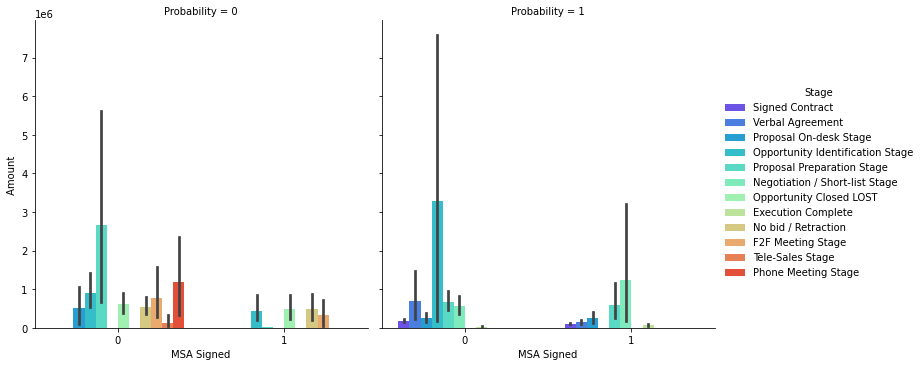

In [ ]:
sns.catplot(x="MSA Signed", y=" Amount ", hue="Stage",col="Probability", kind = 'bar',data=UST, palette = "rainbow")

In [ ]:
UST.describe()

,Project ID,Amount,Expected Revenue,Probability,Stage Number,New Business,MSA Signed
count,6891.000000,6.891000e+03,6.891000e+03,6891.000000,6891.000000,6891.000000,6891.000000
mean,3468.259034,2.925607e+05,1.115754e+05,0.574953,4.145262,0.261065,0.192860
std,2003.099804,1.916039e+06,8.090385e+05,0.494386,4.652349,0.439247,0.394573
min,1.000000,-9.009600e+05,-9.009600e+05,0.000000,-3.000000,0.000000,0.000000
25%,1740.500000,6.306300e+03,0.000000e+00,0.000000,-1.000000,0.000000,0.000000
50%,3464.000000,4.252500e+04,7.500000e+03,1.000000,8.000000,0.000000,0.000000
75%,5186.500000,1.350100e+05,6.162568e+04,1.000000,8.000000,1.000000,0.000000
max,7132.000000,9.100000e+07,3.960000e+07,1.000000,8.000000,1.000000,1.000000


In [ ]:
UST['Stage Number'].mean() * 1/2

2.0726309679291828

In [ ]:
UST[' Amount '].mean(),UST[' Amount '].median()

(292560.71132056316, 42525.0)

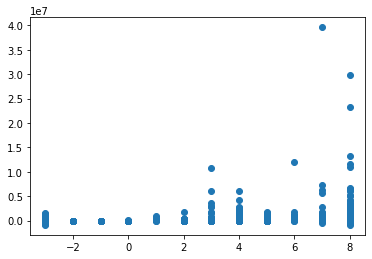

In [ ]:
x=UST['Stage Number']
y=UST['Expected Revenue']
plt.scatter(x,y)

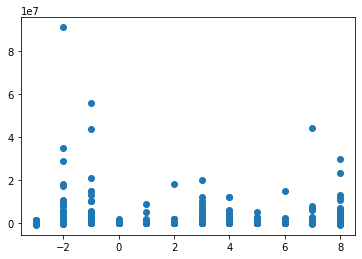

In [ ]:
x=UST['Stage Number']
y=UST[' Amount ']
plt.scatter(x,y)

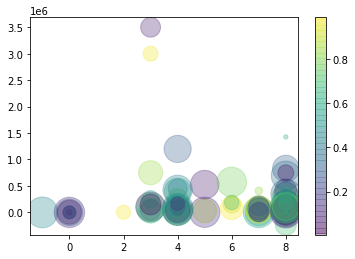

In [ ]:
#plot to see the distribtion of revenues vs stage number
rng=np.random.RandomState(0)
x=UST2['Stage Number']
y=UST2['Expected Revenue']
colors=rng.rand(100)
sizes=1000*rng.rand(100)
plt.scatter(x,y,c=colors,s=sizes,alpha=.3)
plt.colorbar()

In [ ]:
# Find all correlations and sort 
correlations_data = UST.corr()['Probability'].sort_values()

# Print the correlations
print(correlations_data.head(15), '\n')

New Business       -0.088450
Project ID         -0.064737
 Amount            -0.054859
MSA Signed          0.034142
Expected Revenue    0.102259
Stage Number        0.552487
Probability         1.000000
Name: Probability, dtype: float64 



In [ ]:
# # Find all correlations and sort 
# correlations_data2 = UST2.corr()['Probability'].sort_values()

# # Print the most negative correlations
# print(correlations_data2.head(15), '\n')

# Data cleaning


,Total,Percent
Service Category,673,9.766362
Unsolicited Proposal,9,0.130605
Account Type,6,0.087070
Deliverable Type,5,0.072558
Billing Type,2,0.029023


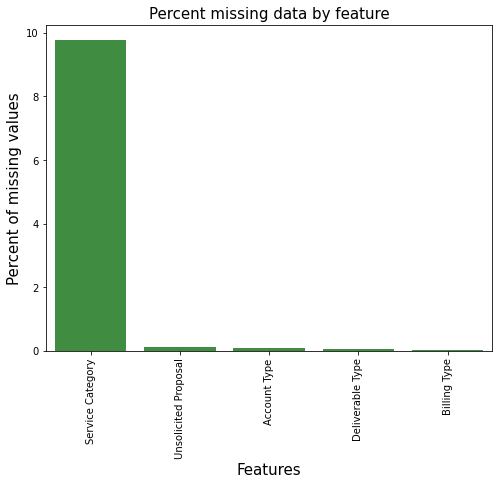

In [ ]:
#Looking at the missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(UST)

In [ ]:
drop_column = ['Service Category']
UST.drop(drop_column, axis=1, inplace = True)

In [ ]:
UST['Billing Type'].fillna(UST['Billing Type'].mode()[0], inplace = True)
UST['Deliverable Type'].fillna(UST['Deliverable Type'].mode()[0], inplace = True)
UST['Account Type'].fillna(UST['Account Type'].mode()[0], inplace = True)
UST['Unsolicited Proposal'].fillna(UST['Unsolicited Proposal'].mode()[0], inplace = True)


In [ ]:
UST.isnull().sum()

Project ID              0
Opportunity Owner       0
Account Name            0
Stage                   0
 Amount                 0
Expected Revenue        0
Probability             0
Service Line            0
Stage Number            0
New Business            0
Account Type            0
Billing Type            0
MSA Signed              0
Unsolicited Proposal    0
Deliverable Type        0
dtype: int64

In [ ]:
UST.dtypes

Project ID                int64
Opportunity Owner        object
Account Name             object
Stage                    object
 Amount                 float64
Expected Revenue        float64
Probability               int64
Service Line             object
Stage Number              int64
New Business              int64
Account Type             object
Billing Type             object
MSA Signed                int64
Unsolicited Proposal     object
Deliverable Type         object
dtype: object

In [ ]:
UST.shape

(6891, 15)

In [ ]:
(UST['MSA Signed'].mean(), UST['Probability'].mean())

(0.19286025250326513, 0.5749528370338122)

In [ ]:
bill = pd.get_dummies(UST['Billing Type'])
bill.head(5)

,Fixed Bid,Flat Fee Monthly,Internal,Per Seat,Per Transaction,T and E with Cap,Time and Expense
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0


In [ ]:
all_data = UST
import re
                                                                            
traindf=UST

traindf = pd.get_dummies(traindf, columns = ["Opportunity Owner","Account Name","Stage","Service Line","Stage Number","Account Type","Billing Type","Unsolicited Proposal","Deliverable Type"],
                             prefix=["Owner","Account","Stg","SvcLn","StgNum","Acctype","Billngtype","UnSolProp","DelType"])

In [ ]:
traindf.head()

,Project ID,Amount,Expected Revenue,Probability,New Business,MSA Signed,Owner_Ajith Daniel,Owner_Alan Johnson,Owner_Amandeep Sidhu,Owner_Amit Mullerpattan,...,Billngtype_Internal,Billngtype_Per Seat,Billngtype_Per Transaction,Billngtype_T and E with Cap,Billngtype_Time and Expense,UnSolProp_No,UnSolProp_Yes,DelType_Managed Services / SLA Based,DelType_Scope of Work / Project,DelType_Staff Augmentation
0,1,7680.0,7680.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,2,6400.0,5760.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,3,3600.0,3240.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,4,3600.0,3240.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,50224.0,50224.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
print(correlations_traindf.tail(15), '\n')


Account_Vanguard                  0.100452
Expected Revenue                  0.102259
StgNum_4                          0.110136
Stg_Proposal Preparation Stage    0.110136
Account_KPMG L.L.P.               0.122508
Owner_Ashwani Bhasin              0.127661
Acctype_US-East BU                0.129042
Stg_Verbal Agreement              0.131495
StgNum_7                          0.131495
Stg_Execution Complete            0.160690
StgNum_-3                         0.160690
DelType_Staff Augmentation        0.168380
StgNum_8                          0.510463
Stg_Signed Contract               0.510463
Probability                       1.000000
Name: Probability, dtype: float64 



In [ ]:
correlations_traindf = traindf.corr()['Probability'].sort_values()
print(correlations_traindf.head(15), '\n')

Stg_No bid / Retraction                -0.509086
StgNum_-2                              -0.508812
StgNum_-1                              -0.394183
Stg_Opportunity Closed LOST            -0.394183
Stg_Opportunity Identification Stage   -0.166397
StgNum_3                               -0.166397
Owner_Venkatesh Rao                    -0.156948
DelType_Scope of Work / Project        -0.115939
DelType_Managed Services / SLA Based   -0.114865
Owner_Denny Mathews                    -0.105549
Owner_Erich Kreidler                   -0.104199
Stg_F2F Meeting Stage                  -0.102393
StgNum_2                               -0.102393
Account_H&R Block                      -0.088611
New Business                           -0.088450
Name: Probability, dtype: float64 



In [ ]:
own_prob = UST.groupby('Opportunity Owner')['Probability'].sum().sort_values()
own_prob.tail(6), '\n'

(Opportunity Owner
 Mahesh Bhaskar     147
 Praveen Syamala    177
 Santosh Rajput     178
 Ashwani Bhasin     191
 Jose Ossa          205
 Kevin Swanson      260
 Name: Probability, dtype: int64,
 '\n')

# Algorithm


In [ ]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

all_features = traindf.drop("Probability",axis=1)
Targeted_feature = traindf["Probability"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
# Train the logistic regression model with training data

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.96


Text(0.5, 1.05, 'Confusion_matrix')

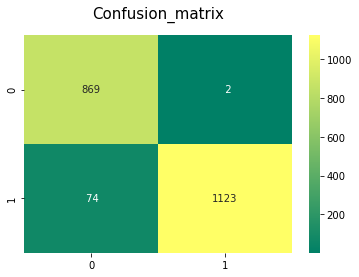

In [ ]:
# predict the model output with test data 

y_pred = logreg.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

Text(33.0, 0.5, 'predicted label')

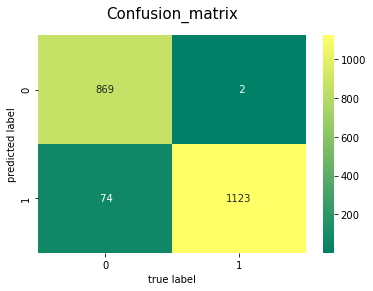

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       943
           1       0.94      1.00      0.97      1125

    accuracy                           0.96      2068
   macro avg       0.97      0.96      0.96      2068
weighted avg       0.97      0.96      0.96      2068



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
y_pred_rm=model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_pred_rm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.99      1.00      1.00      1194

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



Text(91.68, 0.5, 'predicted label')

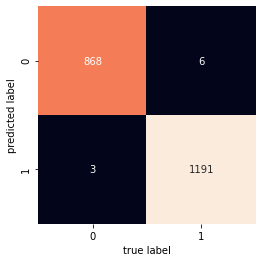

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred_rm)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print(y_pred_rm)

[0 0 1 ... 0 1 0]


In [ ]:
y_pred_rm.tofile('UST22 Prediction1.csv',sep=',')

In [ ]:
pd.DataFrame(y_test).to_csv("UST22-y_test.csv")